In [3]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def true_func(xx):
    return [(ii-1.5)**2-0.25 for ii in xx]

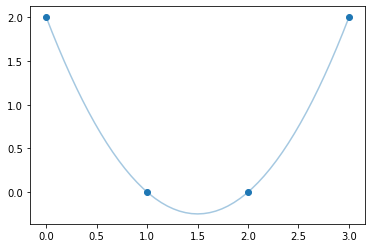

In [51]:
# Very simple quadratic example
N_samp = 4
xx = np.linspace(0, 3, N_samp)
yy = true_func(xx)

plt.scatter(xx, yy)
plt.plot(np.linspace(0, 3, 51), 
         true_func(np.linspace(0, 3, 51)), alpha=0.4)

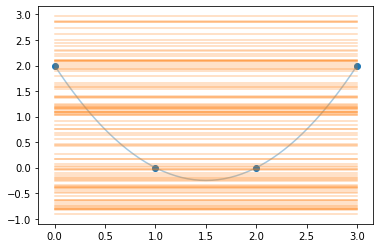

In [52]:
# Assume we have a constant linear model with gaussian noise
# Our prior says that the offset is between -1 and 3 
plt.scatter(xx, yy)
plt.plot(np.linspace(0, 3, 51), 
         true_func(np.linspace(0, 3, 51)), alpha=0.4)

# Given just the prior, many lines are possible
for cc in np.random.uniform(-1, 3, 100):
    plt.plot([0, 3], [cc, cc], 'C1', alpha=0.3)

In [53]:
def calculate_likelihood(bb, sigma_y, yy):
    agg = 1
    for val in yy:
        # Iteratively multiply by the likelihood of each data point
        agg = agg * st.norm.pdf((val-bb)/sigma_y)
    return agg

In [54]:
# Pick 5 lines and calculate the posterior
# As the prior is constant, we can ignore it 

sigma_y = 0.5

for bb in [-1, 0, 1, 2, 3]:
    print('bb=%s \t %s' %(bb, calculate_likelihood(bb, sigma_y, yy)))

bb=-1 	 1.0761207041952661e-19
bb=0 	 2.8505492759881558e-09
bb=1 	 8.497367631712912e-06
bb=2 	 2.850549275988156e-09
bb=3 	 1.0761207041952661e-19


In [ ]:
# The middle line is much more likely since the noise model heavily penalises points far away

Text(0.5, 0, 'bb')

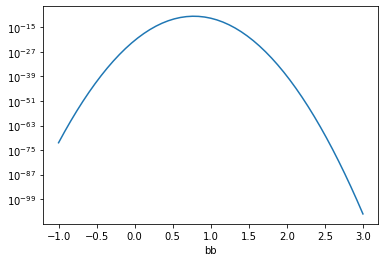

In [50]:
# Plot of likelihood of offset values
plt.plot(np.linspace(-1, 3, 51), 
         [ calculate_likelihood(ii, sigma_y, yy) for ii in np.linspace(-2, 4, 51)])
plt.yscale('log')
plt.xlabel('bb')